In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import numpy as np
from bs4 import BeautifulSoup


In [2]:
df1 = pd.read_csv('train_transaction.csv')
df1.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df2 = pd.read_csv('test_transaction.csv')
df2.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3663554,18403323,57.95,W,12839,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3663555,18403350,87.00,W,16560,476.0,150.0,visa,126.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3663556,18403387,390.00,W,15066,170.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3663557,18403405,103.95,W,2803,100.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3663558,18403416,117.00,W,12544,321.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [5]:
df1['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [6]:
card4_dict = {'visa':1, 'mastercard':2, 'discover':3, 'american express':4, 'nan':5}
df1_new = df1.replace({'card4': card4_dict})

In [7]:
df1_new['card4'].unique()

array([ 3.,  2.,  1.,  4., nan])

In [8]:
df1_new.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,3.0,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,2.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,1.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,2.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,2.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,1.0,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,1.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,1.0,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,1.0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,2.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df1_new.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [10]:
df1_df = df1_new.drop(['ProductCD', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'], axis='columns')
df1_df.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5
0,2987000,0,86400,68.5,13926,NaN,150.0,3.0,142.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0
5,2987005,0,86510,49.0,5937,555.0,150.0,1.0,226.0
6,2987006,0,86522,159.0,12308,360.0,150.0,1.0,166.0
7,2987007,0,86529,422.5,12695,490.0,150.0,1.0,226.0
8,2987008,0,86535,15.0,2803,100.0,150.0,1.0,226.0
9,2987009,0,86536,117.0,17399,111.0,150.0,2.0,224.0


In [11]:
print(df1_df.columns.tolist())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card4', 'card5']


In [12]:
card4_dict_2 = {'visa':1, 'mastercard':2, 'discover':3, 'american express':4, 'nan':5}
df2_new = df2.replace({'card4': card4_dict_2})
df2_new['card4'].unique()

array([ 1.,  2.,  4.,  3., nan])

In [13]:
df1_new.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,3.0,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,2.0,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,1.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,2.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,2.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,1.0,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,1.0,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,1.0,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,1.0,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,2.0,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df2_new.columns.tolist())

['TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83',

In [15]:
df2_df = df2_new.drop(['ProductCD', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339'], axis='columns')
df2_df.head(10)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5
0,3663549,18403224,31.95,10409,111.0,150.0,1.0,226.0
1,3663550,18403263,49.00,4272,111.0,150.0,1.0,226.0
2,3663551,18403310,171.00,4476,574.0,150.0,1.0,226.0
3,3663552,18403310,284.95,10989,360.0,150.0,1.0,166.0
4,3663553,18403317,67.95,18018,452.0,150.0,2.0,117.0
5,3663554,18403323,57.95,12839,321.0,150.0,1.0,226.0
6,3663555,18403350,87.00,16560,476.0,150.0,1.0,126.0
7,3663556,18403387,390.00,15066,170.0,150.0,2.0,102.0
8,3663557,18403405,103.95,2803,100.0,150.0,1.0,226.0
9,3663558,18403416,117.00,12544,321.0,150.0,1.0,226.0


In [16]:
df1_df.notnull().sum()

TransactionID     590540
isFraud           590540
TransactionDT     590540
TransactionAmt    590540
card1             590540
card2             581607
card3             588975
card4             588963
card5             586281
dtype: int64

In [17]:
df1_df.fillna(0)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5
0,2987000,0,86400,68.50,13926,0.0,150.0,3.0,142.0
1,2987001,0,86401,29.00,2755,404.0,150.0,2.0,102.0
2,2987002,0,86469,59.00,4663,490.0,150.0,1.0,166.0
3,2987003,0,86499,50.00,18132,567.0,150.0,2.0,117.0
4,2987004,0,86506,50.00,4497,514.0,150.0,2.0,102.0
...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,0.0,150.0,1.0,226.0
590536,3577536,0,15811049,39.50,10444,225.0,150.0,2.0,224.0
590537,3577537,0,15811079,30.95,12037,595.0,150.0,2.0,224.0
590538,3577538,0,15811088,117.00,7826,481.0,150.0,2.0,224.0


In [18]:
df2_df.fillna(0)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card4,card5
0,3663549,18403224,31.950,10409,111.0,150.0,1.0,226.0
1,3663550,18403263,49.000,4272,111.0,150.0,1.0,226.0
2,3663551,18403310,171.000,4476,574.0,150.0,1.0,226.0
3,3663552,18403310,284.950,10989,360.0,150.0,1.0,166.0
4,3663553,18403317,67.950,18018,452.0,150.0,2.0,117.0
...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,13832,375.0,185.0,2.0,224.0
506687,4170236,34214287,12.173,3154,408.0,185.0,2.0,224.0
506688,4170237,34214326,49.000,16661,490.0,150.0,1.0,226.0
506689,4170238,34214337,202.000,16621,516.0,150.0,2.0,224.0


In [19]:
cc_data_complete_df = pd.merge(df1_df, df2_df, left_index=True, right_index=True )

In [20]:
cc_data_complete_df.head(10)

,TransactionID_x,isFraud,TransactionDT_x,TransactionAmt_x,card1_x,card2_x,card3_x,card4_x,card5_x,TransactionID_y,TransactionDT_y,TransactionAmt_y,card1_y,card2_y,card3_y,card4_y,card5_y
0,2987000,0,86400,68.5,13926,NaN,150.0,3.0,142.0,3663549,18403224,31.95,10409,111.0,150.0,1.0,226.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0,3663550,18403263,49.00,4272,111.0,150.0,1.0,226.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0,3663551,18403310,171.00,4476,574.0,150.0,1.0,226.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0,3663552,18403310,284.95,10989,360.0,150.0,1.0,166.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0,3663553,18403317,67.95,18018,452.0,150.0,2.0,117.0
5,2987005,0,86510,49.0,5937,555.0,150.0,1.0,226.0,3663554,18403323,57.95,12839,321.0,150.0,1.0,226.0
6,2987006,0,86522,159.0,12308,360.0,150.0,1.0,166.0,3663555,18403350,87.00,16560,476.0,150.0,1.0,126.0
7,2987007,0,86529,422.5,12695,490.0,150.0,1.0,226.0,3663556,18403387,390.00,15066,170.0,150.0,2.0,102.0
8,2987008,0,86535,15.0,2803,100.0,150.0,1.0,226.0,3663557,18403405,103.95,2803,100.0,150.0,1.0,226.0
9,2987009,0,86536,117.0,17399,111.0,150.0,2.0,224.0,3663558,18403416,117.00,12544,321.0,150.0,1.0,226.0


In [21]:
renamed_data_df = cc_data_complete_df.rename(columns=  {"TransactionDT_x":"TransactionDT",
                                              "TransactionAmt_x":"TransactionAMT",
                                              "card1_x":"Card1",
                                              "card2_x":"Card2",
                                              "card3_x":"Card3",
                                              "card4_x":"Card_Network",
                                              "card5_x":"Card5",
                                              "isFraud":"IsFraud",
                                              "TransactionID_x":"TransactionID"})
                                                    
renamed_data_df.head()
                                                      
                                                    

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5,TransactionID_y,TransactionDT_y,TransactionAmt_y,card1_y,card2_y,card3_y,card4_y,card5_y
0,2987000,0,86400,68.5,13926,NaN,150.0,3.0,142.0,3663549,18403224,31.95,10409,111.0,150.0,1.0,226.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0,3663550,18403263,49.00,4272,111.0,150.0,1.0,226.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0,3663551,18403310,171.00,4476,574.0,150.0,1.0,226.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0,3663552,18403310,284.95,10989,360.0,150.0,1.0,166.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0,3663553,18403317,67.95,18018,452.0,150.0,2.0,117.0


In [22]:
renamed_data_df.fillna(0)

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5,TransactionID_y,TransactionDT_y,TransactionAmt_y,card1_y,card2_y,card3_y,card4_y,card5_y
0,2987000,0,86400,68.50,13926,0.0,150.0,3.0,142.0,3663549,18403224,31.950,10409,111.0,150.0,1.0,226.0
1,2987001,0,86401,29.00,2755,404.0,150.0,2.0,102.0,3663550,18403263,49.000,4272,111.0,150.0,1.0,226.0
2,2987002,0,86469,59.00,4663,490.0,150.0,1.0,166.0,3663551,18403310,171.000,4476,574.0,150.0,1.0,226.0
3,2987003,0,86499,50.00,18132,567.0,150.0,2.0,117.0,3663552,18403310,284.950,10989,360.0,150.0,1.0,166.0
4,2987004,0,86506,50.00,4497,514.0,150.0,2.0,102.0,3663553,18403317,67.950,18018,452.0,150.0,2.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,3493686,0,13278123,107.95,15530,225.0,150.0,2.0,117.0,4170235,34214279,94.679,13832,375.0,185.0,2.0,224.0
506687,3493687,0,13278134,44.00,7431,555.0,150.0,1.0,226.0,4170236,34214287,12.173,3154,408.0,185.0,2.0,224.0
506688,3493688,0,13278150,227.82,10972,111.0,150.0,2.0,224.0,4170237,34214326,49.000,16661,490.0,150.0,1.0,226.0
506689,3493689,0,13278190,59.00,11218,579.0,150.0,1.0,226.0,4170238,34214337,202.000,16621,516.0,150.0,2.0,224.0


In [23]:
renamed_data_df['TransactionAMT'].count()

506691

In [24]:
col1=['TransactionID']
col2=['TransactionID_y']

col3=['TransactionDT']
col4=['TransactionDT_y']

col5=['TransactionAMT']
col6=['TransactionAmt_y']

col7=['Card1']
col8=['card1_y']

col9=['Card2']
col10=['card2_y']

col11=['Card3']
col12=['card3_y']

col13=['Card_Network']
col14=['card4_y']

col15=['Card5']
col16=['card5_y']

renamed_data_df[col1]=renamed_data_df[col1].combine_first(pd.DataFrame(renamed_data_df[col2].values,columns=col1))

comb_data_df=renamed_data_df.drop(col2, axis=1)

comb_data_df.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5,TransactionDT_y,TransactionAmt_y,card1_y,card2_y,card3_y,card4_y,card5_y
0,2987000,0,86400,68.5,13926,NaN,150.0,3.0,142.0,18403224,31.95,10409,111.0,150.0,1.0,226.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0,18403263,49.00,4272,111.0,150.0,1.0,226.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0,18403310,171.00,4476,574.0,150.0,1.0,226.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0,18403310,284.95,10989,360.0,150.0,1.0,166.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0,18403317,67.95,18018,452.0,150.0,2.0,117.0


In [25]:
comb_data_df[col3]=comb_data_df[col3].combine_first(pd.DataFrame(comb_data_df[col4].values,columns=col3))

comb_data_df1=comb_data_df.drop(col4, axis=1)
comb_data_df1.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5,TransactionAmt_y,card1_y,card2_y,card3_y,card4_y,card5_y
0,2987000,0,86400,68.5,13926,NaN,150.0,3.0,142.0,31.95,10409,111.0,150.0,1.0,226.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0,49.00,4272,111.0,150.0,1.0,226.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0,171.00,4476,574.0,150.0,1.0,226.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0,284.95,10989,360.0,150.0,1.0,166.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0,67.95,18018,452.0,150.0,2.0,117.0


In [26]:
comb_data_df1[col5]=comb_data_df1[col5].combine_first(pd.DataFrame(comb_data_df1[col6].values,columns=col5))

comb_data_df2=comb_data_df1.drop(col6, axis=1)
comb_data_df2.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5,card1_y,card2_y,card3_y,card4_y,card5_y
0,2987000,0,86400,68.5,13926,NaN,150.0,3.0,142.0,10409,111.0,150.0,1.0,226.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0,4272,111.0,150.0,1.0,226.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0,4476,574.0,150.0,1.0,226.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0,10989,360.0,150.0,1.0,166.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0,18018,452.0,150.0,2.0,117.0


In [27]:
comb_data_df2[col7]=comb_data_df2[col7].combine_first(pd.DataFrame(comb_data_df2[col8].values,columns=col7))

comb_data_df3=comb_data_df2.drop(col8, axis=1)

In [28]:
comb_data_df3[col9]=comb_data_df3[col9].combine_first(pd.DataFrame(comb_data_df3[col10].values,columns=col9))

comb_data_df4=comb_data_df3.drop(col10, axis=1)

In [29]:
comb_data_df4[col11]=comb_data_df4[col11].combine_first(pd.DataFrame(comb_data_df4[col12].values,columns=col11))

comb_data_df5=comb_data_df4.drop(col12, axis=1)

In [30]:
comb_data_df5[col13]=comb_data_df5[col13].combine_first(pd.DataFrame(comb_data_df5[col14].values,columns=col13))

comb_data_df6=comb_data_df5.drop(col14, axis=1)

In [31]:
comb_data_df6[col15]=comb_data_df6[col15].combine_first(pd.DataFrame(comb_data_df6[col16].values,columns=col15))

comb_data_final_df=comb_data_df6.drop(col16, axis=1)
comb_data_final_df.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5
0,2987000,0,86400,68.5,13926,111.0,150.0,3.0,142.0
1,2987001,0,86401,29.0,2755,404.0,150.0,2.0,102.0
2,2987002,0,86469,59.0,4663,490.0,150.0,1.0,166.0
3,2987003,0,86499,50.0,18132,567.0,150.0,2.0,117.0
4,2987004,0,86506,50.0,4497,514.0,150.0,2.0,102.0


In [32]:
average = comb_data_final_df["TransactionAMT"].mean()
average

134.68116811074742

In [33]:
final_df=comb_data_final_df.drop(comb_data_final_df.query('IsFraud == 0').sample(frac=.96).index)

In [34]:
final_df['IsFraud'].value_counts()

0    19559
1    17707
Name: IsFraud, dtype: int64

In [35]:
final_df.to_csv(r'C:\Users\Rjmcc\Desktop\ClassFolder\FraudulentCharges\export_dataframe.csv', index=False)

In [36]:
non_fraud_df = final_df[final_df['IsFraud'] == 0]
non_fraud_df.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5
1,2987001,0,86401,29.000,2755,404.0,150.0,2.0,102.0
17,2987017,0,86668,100.000,11492,111.0,150.0,2.0,219.0
71,2987071,0,87736,59.000,1662,111.0,150.0,1.0,195.0
72,2987072,0,87752,6.767,13832,375.0,185.0,2.0,224.0
85,2987085,0,87935,42.596,15885,545.0,185.0,1.0,138.0


In [37]:
non_fraud_df['Card1'].count()

19559

In [55]:
sorted_non_fraud_df = non_fraud_df.sort_values(by=['Card1', 'TransactionAMT'])
sorted_non_fraud_df.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5
164336,3151336,0,3504180,29.00,1001,555.0,150.0,1.0,226.0
90801,3077801,0,1890723,50.00,1029,555.0,199.0,4.0,219.0
424528,3411528,0,10753157,25.95,1030,157.0,150.0,1.0,226.0
166015,3153015,0,3538075,54.00,1030,157.0,150.0,1.0,226.0
233237,3220237,0,5520554,107.95,1030,157.0,150.0,1.0,226.0


In [38]:
is_fraud_df = final_df[final_df['IsFraud'] == 1, ]
is_fraud_df.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5
203,2987203,1,89760,445.000,18268,583.0,150.0,1.0,226.0
240,2987240,1,90193,37.098,13413,103.0,185.0,1.0,137.0
243,2987243,1,90246,37.098,13413,103.0,185.0,1.0,137.0
245,2987245,1,90295,37.098,13413,103.0,185.0,1.0,137.0
288,2987288,1,90986,155.521,16578,545.0,185.0,1.0,226.0


In [56]:
sorted_fraud_df = is_fraud_df.sort_values(by=['Card1', 'TransactionAMT'])
sorted_fraud_df.head()

,TransactionID,IsFraud,TransactionDT,TransactionAMT,Card1,Card2,Card3,Card_Network,Card5
468404,3455404,1,12076280,450.00,1015,555.0,144.0,2.0,224.0
294990,3281990,1,7279067,100.00,1016,555.0,150.0,1.0,226.0
178194,3165194,1,3882020,300.00,1022,479.0,150.0,1.0,226.0
472943,3459943,1,12231539,57.95,1039,391.0,150.0,1.0,166.0
472939,3459939,1,12231497,77.95,1039,391.0,150.0,1.0,166.0


In [39]:
is_fraud_df['Card1'].count()

17707

In [40]:
for i, fraud in is_fraud_df.groupby(['Card1']):
                print(fraud)

        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
468404        3455404        1       12076280           450.0   1015  555.0   

        Card3  Card_Network  Card5  
468404  144.0           2.0  224.0  
        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
294990        3281990        1        7279067           100.0   1016  555.0   

        Card3  Card_Network  Card5  
294990  150.0           1.0  226.0  
        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
178194        3165194        1        3882020           300.0   1022  479.0   

        Card3  Card_Network  Card5  
178194  150.0           1.0  226.0  
        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
472939        3459939        1       12231497           77.95   1039  391.0   
472943        3459943        1       12231539           57.95   1039  391.0   
473054        3460054        1       12234396           77.95   

In [41]:
for i, nonfraud in non_fraud_df.groupby(['Card1']):
    print(nonfraud)

        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
164336        3151336        0        3504180            29.0   1001  555.0   

        Card3  Card_Network  Card5  
164336  150.0           1.0  226.0  
       TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
90801        3077801        0        1890723            50.0   1029  555.0   

       Card3  Card_Network  Card5  
90801  199.0           4.0  219.0  
        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Card2  \
166015        3153015        0        3538075           54.00   1030  157.0   
233237        3220237        0        5520554          107.95   1030  157.0   
424528        3411528        0       10753157           25.95   1030  157.0   

        Card3  Card_Network  Card5  
166015  150.0           1.0  226.0  
233237  150.0           1.0  226.0  
424528  150.0           1.0  226.0  
        TransactionID  IsFraud  TransactionDT  TransactionAMT  Card1  Car

In [42]:
# X = is_fraud_df[['Card1', 'TransactionAMT']].copy()
# X['Card1'] = LabelEncoder().fit_transform(X['Card1'])
# X['TransactionAMT'] = LabelEncoder().fit_transform(X['TransactionAMT'])
# X = X.dropna()
# X.head

<bound method NDFrame.head of         Card1  TransactionAMT
203      1570            2017
240      1150             777
243      1150             777
245      1150             777
288      1408            1712
...       ...             ...
506216    897            1947
506423    422            2158
506529    824            1136
506550    824            1750
506680   1170            1136

[17707 rows x 2 columns]>

In [43]:
# X_scaled = MinMaxScaler().fit_transform(X)
# X_scaled

array([[0.99178774, 0.90044643],
       [0.72646873, 0.346875  ],
       [0.72646873, 0.346875  ],
       ...,
       [0.52053064, 0.50714286],
       [0.52053064, 0.78125   ],
       [0.73910297, 0.50714286]])

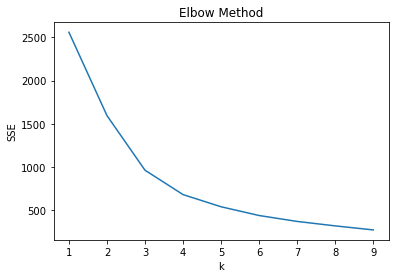

In [44]:
# sse = {}
# K = range(1, 10)
# for k in K:
#     kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
#     sse[k] = kmeanmodel.inertia_

# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel('k')
# plt.ylabel('SSE')
# plt.title('Elbow Method')
# plt.show()